# ВСЕ НОДЫ СЛЕВА МЕНЬШЕ, ВСЕ НОДЫ СПРАВА БОЛЬШЕ

### Cormen, 286 p.

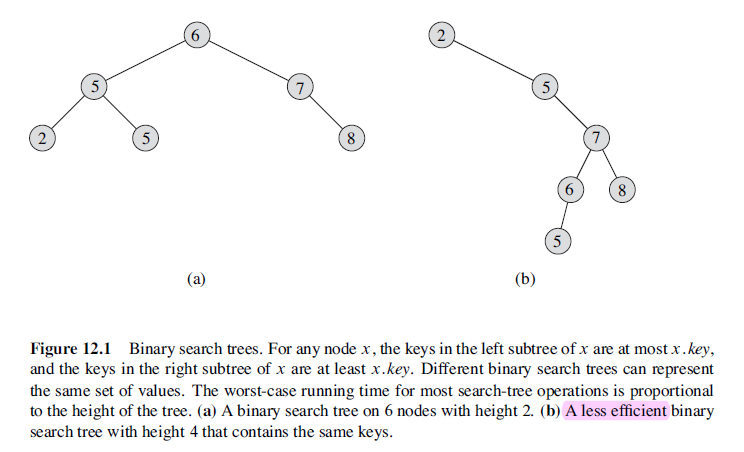

**Experience has shown binary trees serve as a good data structure for representing linearly ordered data, and that balanced binary trees provide a guaranteed fast structure (Knuth, 6.2.3).**

### Main property of binary-search-tree


Let x be a node in a binary search tree. If y is a node in the left subtree
of x, then y.key <= x.key. If y is a node in the right subtree of x, then
y.key >= x.key.\
The binary-search-tree property allows us to print out all the keys in a binary
search tree **in sorted order** by a simple recursive algorithm, called an `inorder tree walk.`

Minimum height of binary tree with n nodes:
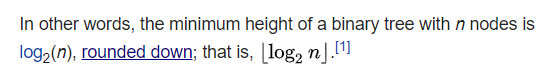

### Tree traversals

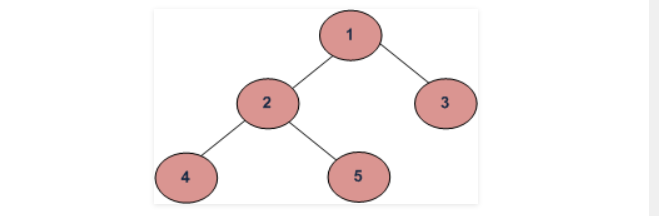

Depth First Traversals:
- (a) Inorder (Left, Root, Right) : 4 2 5 1 3. *In case of binary search trees (BST)*, Inorder traversal gives nodes in non-decreasing order.
- (b) Preorder (Root, Left, Right) : 1 2 4 5 3
- (c) Postorder (Left, Right, Root) : 4 5 2 3 1

Breadth First or Level Order Traversal : 1 2 3 4 5
Please see this post for Breadth First Traversal.

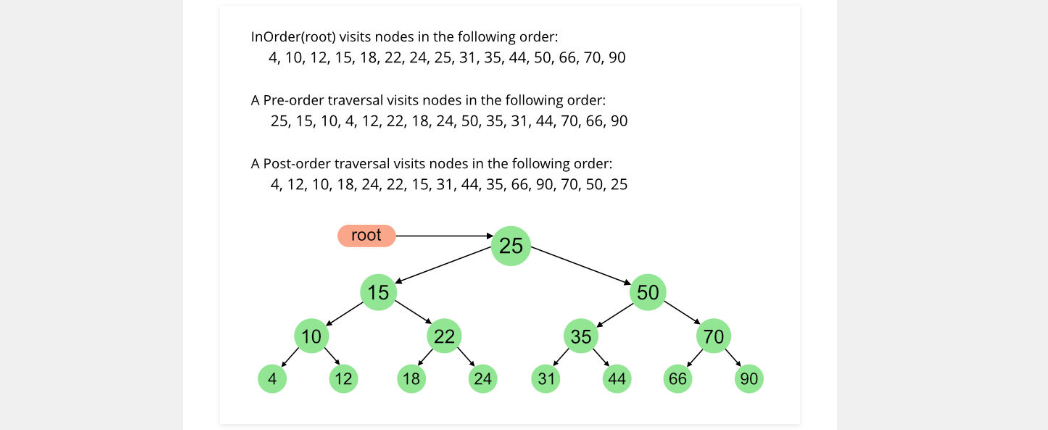

In [63]:
# some utilities

class clr:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    UNDERLINE = '\033[4m'
    
    @staticmethod
    def bold(string):
        BOLD = '\033[1m'
        END = '\033[0m'
        return BOLD + string + END
    
print(clr.bold("daa"))

daa


In [88]:
class Node():
    '''
    Ноды, которые будут использоваться при построении бинарного дерева поиска
    '''
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None
        self.p = None # parent 
    
    
    def __repr__(self):
        '''
        print the object
        '''
        left = None if self.left is None else self.left.key
        root = self.key
        right = None if self.right is None else self.right.key
        return f"{left} -- {root} -- {right}"
    

#binary search tree
class BST():
    def __init__(self):
        self.T = None
        self.root = None
        pass
    
    def tree_insert(self, z):
        '''
        :param z: Node object, new inserted object
        '''
        y = None
        x = self.root
        while x != None:
            y = x
            if z.key < x.key:
                # искомое место вставки слева
                x = x.left 
            else:
                # искомое место вставки справа
                x = x.right
        z.p = y
        if y == None:
            self.root = z # tree was empty
        elif z.key < y.key:
            y.left = z
        else:
            y.right = z
            
    def tree_search(self, k):
        '''
        :param k - Node obj, key which we want to find
        :return: Node obj or None
        '''
        x = self.root  
        while (x != None and x.key != k):
            if k < x.key:
                x = x.left
            else:
                x = x.right
        return x
                
    '''
    If x is the root of an n-node subtree, then the call INORDER-TREE-WALK(x)
    takes O(n) time.
    '''
    def inorder_tree_walk(self, x):
        '''
        The binary-search-tree property allows us to print out all the keys in a binary search 
        tree in sorted order by a simple recursive algorithm, called an inorder tree walk.
        :param x: - Node object, любой, с которого начнется процесс печати
        '''
        if x != None:
            # сначала печатаются все объекты слева
            self.inorder_tree_walk(x.left)
            print(x.key, end = ' ')
            self.inorder_tree_walk(x.right)
            
    def postorder_tree_walk(self, x):
        '''
        Postorder traversal is used to delete the tree. Postorder traversal is 
        also useful to get the postfix expression of an expression tree.
        
        '''
        if x != None:
            self.postorder_tree_walk(x.left)
            self.postorder_tree_walk(x.right)
            print(x.key, end=' ')
            
    def preorder_tree_walk(self, x):
        '''
        Preorder traversal is used to create a copy of the tree. 
        Preorder traversal is also used to get prefix expression on of an expression tree.
        '''
        if x != None:
            print(x.key, end = ' ')
            self.preorder_tree_walk(x.left)
            self.preorder_tree_walk(x.right)
            
        
    def tree_min(self, x):
        '''
        Ищет мин ноду итерационно спускаясб по левой ветви
        :param x: - Node obj
        '''
        while x.left != None:
            x = x.left
        return x
    
    def tree_max(self, x):
        '''
        Ищет макс ноду итерационно спускаясб по левой ветви
        :param x: - Node obj
        '''
        while x.right != None:
            x = x.right
        return x
        
    def tree_successor(self, x):
        '''
        Return successor of a node x with the smallest key greater than x.key.
        Ищет следующий по величине элемент
        :param x: Node obj
        '''
        if x.right != None:
            return self.tree_min(x.right)
        y = x.p
        while y != None and x == y.right:
            x = y
            y = y.p
        return y
    
    def transplant(self, u, v):
        '''
        replaces one subtree as a child of its parent with another subtree
        :param u: - Node obj, удаляемая нода
        :param v: - Node obj, root node of subtree, которое мы пристраиваем вместо u
        '''
        if u.p == None: # если удаляемый элемент - корень
            self.root = v
        elif u == u.p.left: # если удаляемый элемент слева от родителя
            u.p.left = v 
        else:
            u.p.right = v # если удаляемый элемент справа от родителя
        if v != None: # если есть ребенок у удаляемого элемента, назначаем родителя
            v.p = u.p
               
    def tree_delete(self, z):
        if z.left == None: # figure a
            self.transplant(z, z.right) # берем z ноду и правое поддерево для его пересадки в z.p
        if z.right == None: # figure b
            self.transplant(z, z.left) # берем z ноду и левое поддерево для его пересадки в z.p
        else: # z has two children
            y = self.tree_min(z.right) # далее чтобы понять, легче нарисвать на бумажке дерево 
            # в комментах и удалить node(7) (не leaf(7))
            if y.p != z: 
                self.transplant(y, y.right)
                y.right = z.right 
                y.right.p = y
            self.transplant(z, y)
            y.left = z.left
            y.left.p = y
'''
test
    5
   / \
  4   7
    /  \
   6    8
       /
      7
'''
bst = BST()
nodes = list()
for i in [5,4,7,6,8,7]:
    z = Node(i)
    nodes.append(z)
    bst.tree_insert(z) # O(h) time on a tree of height h.

print(clr.bold("\n inorder traversal -> "), end='') ; bst.inorder_tree_walk(nodes[0]) # O(n)

print(clr.bold("\n postorder traversal -> "), end='') ; bst.postorder_tree_walk(nodes[0]) # O(n)

print(clr.bold("\n preorder traversal -> "), end='') ; bst.preorder_tree_walk(nodes[0]) # O(n)

res = bst.tree_search(4) # O(h), где h - высота дерева
print("\n", res, sep='')

res = bst.tree_min(nodes[0]) # O(h), где h - высота дерева
print(res)

res = bst.tree_max(nodes[0]) # O(h), где h - высота дерева
print(clr.bold("tree max:"), res)

res = bst.tree_successor(nodes[3]) # on a tree of height h is O.h/,
print(clr.bold("tree_successor"), res)

bst.tree_delete(nodes[-2]) # удаляем ноду из дерева


 inorder traversal -> 4 5 6 7 7 8 
 postorder traversal -> 4 6 7 8 7 5 
 preorder traversal -> 5 4 7 6 8 7 
None -- 4 -- None
None -- 4 -- None
tree max: 7 -- 8 -- None
tree_successor 6 -- 7 -- 8


### баланисровка бинарных деревьев

If, for example, the n items are inserted in strictly increasing order, the tree will be a chain with height n - 1.
On the other hand, Exercise B.5-4 shows that h $>=$[lg n]. As with quicksort, we
can show that the behavior of the average case is much closer to the best case than
to the worst case.\
Unfortunately, little is known about the average height of a binary search tree
when both insertion and deletion are used to create it. When the tree is created
by insertion alone, the analysis becomes more tractable. Let us therefore define a
randomly built binary search tree on n keys as one that arises from inserting the
keys in random order into an initially empty tree, where each of the nŠ permutations
of the input keys is equally likely. (Exercise 12.4-3 asks you to show that this notion
is different from assuming that every binary search tree on n keys is equally likely.)
In this section, we shall prove the following theorem.

Обычно несбалансированные деревья получаются в результате сортированого заполнения
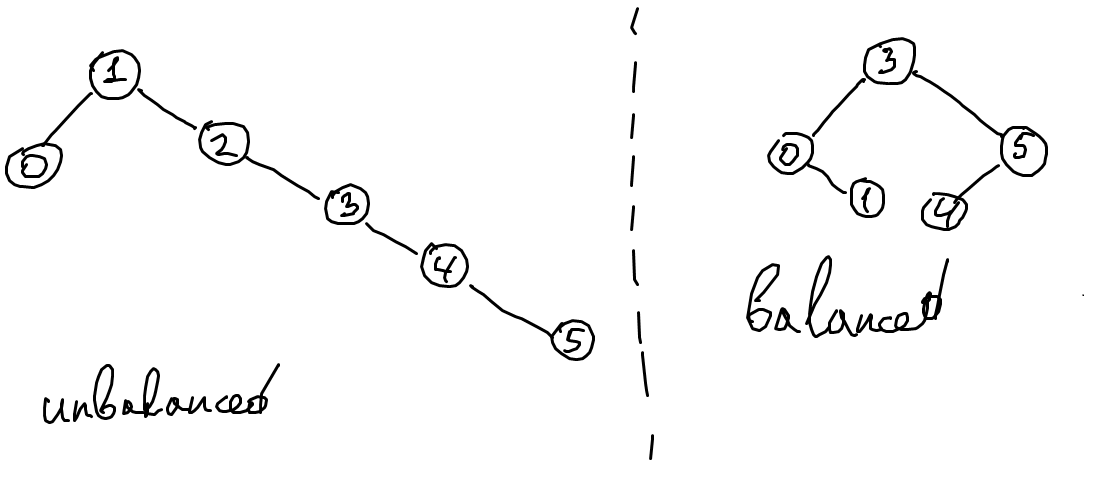

However, the simplest algorithms for BST item insertion may yield a tree with nodes n in rather common situations. For example, when the items are inserted in sorted key order, the tree degenerates into a linked list with n nodes. The difference in performance between the two situations may be enormous: for example, when n = 1,000,000, the minimum height is {\displaystyle \lfloor \log _{2}(1,000,000)\rfloor =19}\lfloor \log _{2}(1,000,000)\rfloor =19.

If the data items are known ahead of time, the height can be kept small, in the average sense, by adding values in a random order, resulting in a **random binary search tree**. However, there are many situations **(such as online algorithms)** where this randomization is not viable.

Self-balancing BSTs have better worst-case lookup performance than hash tables (O(log n) compared to O(n)), but have worse average-case performance (O(log n) compared to O(1)).


### Implementations
- 2–3 tree
- AA tree
- AVL tree
- B-tree
- Red–black tree
- Scapegoat tree
- Splay tree
- Treap
- Weight-balanced tree